## Ex. 1-2) Modify colors using HSV (hue, saturation, and value) color space
Sometimes it is easier to convert pixel valeus from RGB to HSV and modify them. Write a code that increaess saturation values of an input image to 1.2 times. See https://www.rapidtables.com/convert/color/index.html for converting equations.
<img src="fig/rgb2hsv.png" style="width:400px">

### Type your code below.

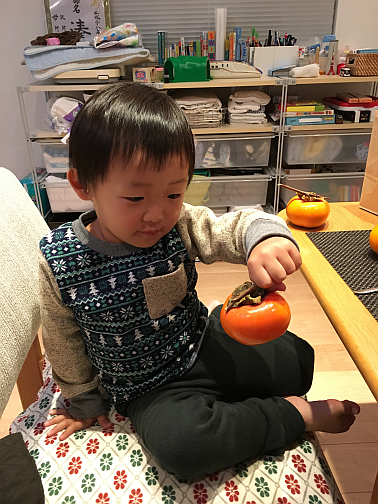

(504, 378, 3)
uint8


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

img_path = "./in/kid.png"

img = Image.open(img_path)

img.show()
img_arr = np.asarray(img)
print(img_arr.shape)
print(img_arr.dtype)

In [ ]:
# In Python, dictionary can hash functions! We will use that.

def hue_calc_R(g, b, cmax, cmin):
    h = (60 * ((g - b) / diff) + 360) % 360
    
def hue_calc_G(r, b, cmax, cmin):
    h = (60 * ((g - b) / diff) + 360) % 360
    
def hue_calc_B(r, g, cmax, cmin):
    h = (60 * ((g - b) / diff) + 360) % 360

def cmax_to_hue

cmax_to_hue_calc = {"r":, "g", "b"}

In [ ]:
# In Python, dictionary can hash functions! We will use that.

cmax_to_hue_calc = {"r":, "g", "b"}

Example code:

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/kid.png"
img = Image.open(in_img_path)
pix = np.asarray(img)

In [ ]:
values = np.float32(pix)
values = values/255.0
hsv = np.copy(values)
result = np.copy(values)

max = np.amax(values,2)
min = np.amin(values,2)
delta = max - min

h = pix.shape[0]
w = pix.shape[1]

# Convert to HSV and scale the saturation by 1.2
for i in range(0,h):
    for j in range (0, w):
        if delta[i,j] < 1e-4:
            hue = 0
        else:
            # if max = red
            if abs(max[i,j] - values[i,j,0]) < 1e-5:
                hue = 60 * (((values[i,j,1] - values[i,j,2])/delta[i,j])%6) 
            else:
                # if max = green
                if abs(max[i,j] - values[i,j,1]) < 1e-5:
                    hue = 60*((values[i,j,2] - values[i,j,0])/delta[i,j] +2) 
                else:
                    # max = blue
                    hue = 60*((values[i,j,0] - values[i,j,1])/delta[i,j] +4)  
        if max[i,j] < 1e-5:
            saturation = 0
        else:
            saturation = delta[i,j]/max[i,j]               
        
        hsv[i,j,0] = hue
        hsv[i,j,2] = max[i,j]
        if max[i,j] > 0.1:
            hsv[i,j,1] = saturation*1.2 # multiply by a factor of 1.2 
        else:
            hsv[i,j,1] = saturation
        # you need to clip the values, othewise you will see unwanted noise
        if saturation * 1.2 > 1.0:
            hsv[i,j,1] = 1.0

# Convert back to RGB
for i in range(0,h):
    for j in range (0, w):
        hue = hsv[i,j,0]
        saturation = hsv[i,j,1]
        value = hsv[i,j,2]
        c = value * saturation
        x = c * (1- abs( (hue/60)%2 -1))
        m = value - c
        if 0 <= hue and hue < 60:
            result[i,j,0] = c
            result[i,j,1] = x
            result[i,j,2] = 0
        else:
            if 60 <= hue and hue < 120:
                result[i,j,0] = x
                result[i,j,1] = c
                result[i,j,2] = 0
            else:
                if 120 <= hue and hue < 180:
                    result[i,j,0] = 0
                    result[i,j,1] = c
                    result[i,j,2] = x
                else:
                    if 180 <= hue and hue <240:
                        result[i,j,0] = 0
                        result[i,j,1] = x
                        result[i,j,2] = c
                    else:
                        if 240 <= hue and hue <300:
                            result[i,j,0] = x
                            result[i,j,1] = 0
                            result[i,j,2] = c
                        else:
                            if 300 <= hue and hue <360:
                                result[i,j,0] = c
                                result[i,j,1] = 0
                                result[i,j,2] = x
        for k in range(0,3):
            result[i,j,k] = (result[i,j,k]+m)*255
            
# you probably need clipping
np.clip(result, 0, 255)

# save and also show results
results = Image.fromarray(np.uint8(result))
results.save("sat_mod.png") 

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(results)

plt.show(block=True)